<a href="https://colab.research.google.com/github/ShaunakSen/Deep-Learning/blob/master/Copy_of_3_1_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Gradient Descent

In this lab we will implement some of the optimisation methods we learned in the lecture. First, we will start by revisiting gradient descent for linear regression. However, in this implementation we will observe how the model parameters are updated over iterations of the gradient descent algorithm. 

Let's start by implementing gradient descent on a simple linear regression dataset, like the one you generated in Lab 1, but this time shifted so that it ranges from -5 to 5.

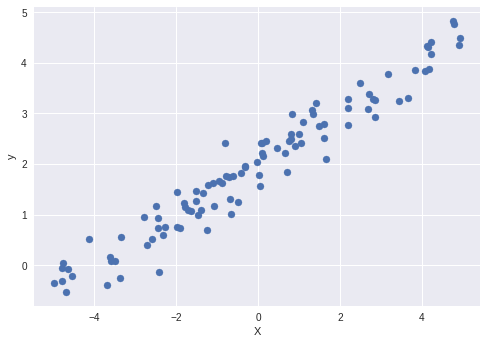

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## generate M data points roughly forming a line (noise added)
M = 100
theta_true = torch.Tensor([[0.5], [2]])


X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0

# print(X.shape)

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)

# print(y.shape)

# print(X[:,0].numpy())

# print(y.numpy().reshape(1,100)[0])

plt.scatter(X[:,0].numpy(), y.numpy().reshape(1,100)[0]);
plt.xlabel("X");
plt.ylabel("y");

## visualise the data by plotting it
# YOUR CODE HERE
# raise NotImplementedError()

You should now have data points according to y = mx + b where m = theta_true[0,0] and b = theta_true[1,0]. Note, $m = \theta_1$ and $b = \theta_0$.

Now, let's implement gradient descent using the Mean Squared Error (MSE) cost function. 

Recall that: 

$J(\theta) = \frac{1}{2 M} \sum_{i = 1}^M (h_{\theta} (x^{(i)}) - y^{(i)} )^2$

for $i = 1 \text{  to iters (or until convergence)}$ <br>

$\hspace{1cm} w_i \leftarrow w_i - \eta \frac{\partial J}{\partial w_i}$

Implement the functions below in order to plot the cost function as well as the weight updates over iterations of gradient descent.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## hypothesis computes $h_theta$
def hypothesis(theta, X):
    # YOUR CODE HERE
    
    return X.mm(theta)
  
    
    # raise NotImplementedError()

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
def grad_cost_func(theta, X, y): 
    # YOUR CODE HERE
    
    M = X.shape[1]
    
    grad = 1/M * X.t().mm(hypothesis(theta, X) - y)
    
    # raise NotImplementedError()
    
    return grad

## cost_func computes the cost function J
def cost_func(theta, X, y): 
    """
    This func should accept a matrix where each row is a value of theta_0 and theta_1
    
    It should return a list of losses for such rows
    
    cost_func(this_theta,X,y)[0] <- only one loss value comes as we are computing loss for only one theta
    
    J_grid = cost_func(theta_grid.t(), X, y) : 100 loss values for each pair of theta value from theta_grid()
    
    This will help us plot the fig in RHS (for 100 vals of theta_1 what was the loss)
    
    """

    M = X.shape[1]
    
    # print (theta)
    
    # print(theta.shape)
    
    loss_values = []
    number_of_thetas = theta.shape[1]
    
    # for each theta pair compute the loss
    
    for i in range(number_of_thetas):
      theta_value = theta[:,i].reshape(2,1)      
     
      h_theta = hypothesis(theta_value, X)
      
      loss = 1/(2*M) * ((h_theta-y).t().mm(h_theta-y))
      loss = loss.item()
      loss_values.append(loss)
    
    
    
    
    return loss_values
    

In [0]:
print(X.shape, theta_true.shape, y.shape)

print(X.mm(theta_true).shape)

torch.Size([100, 2]) torch.Size([2, 1]) torch.Size([100, 1])
torch.Size([100, 1])


Now let's plot the updates to see what is happening as we iterate over the algorithm. First, we will plot $J$ as a function of $\theta_1$ as well as the resulting equation of the line learned over $N=5$ iterations. Once your code is working, modify the value of $\eta$ to see how it affects convergence.

The figure below illustrates what you're aiming to plot. Note, much of the code to generate the figures is given below, you mostly need to complete the 3 functions above and then fill in a few missing lines of code below.

<img src="http://comp6248.ecs.soton.ac.uk/labs/lab3/Figure1.png">

### First generate the figure on the left hand side. This plot shows the data and the linear fit of the data as the model parameters change over the 5 iterations.

In [0]:
test = torch.tensor([[1975.8629]])

test.item()

1975.8629150390625

torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 1])
tensor([[45.0800,  2.5216,  2.4994,  2.4990,  2.4988]]) tensor([[[0.0000, 0.5111, 0.4995, 0.4998, 0.4998]],

        [[2.0000, 1.9912, 1.9927, 1.9937, 1.9946]]])
1.9946396350860596
torch.Size([2, 1])
0.0 2.0
0.51105446 1.9912134
0.49952734 1.9926884
0.49980968 1.9937404
0.49982184 1.9946396


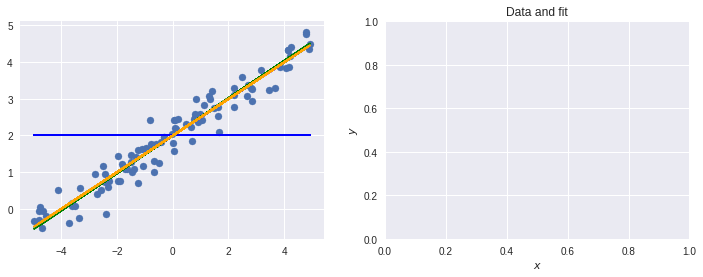

In [0]:
## Now we can plot the lines over iterations
## To do this, we start by constructing a grid of parameter pairs and their corresponding cost function values. 

# plot 100 pts
x_axis = np.linspace(-1,1,100)
# print(x_axis)


theta_grid = torch.Tensor(len(x_axis),2)

# theta_grid shape: 100x2

# fill 1st col with values from x_axis and 2nd col with 2

theta_grid[:,0] = torch.from_numpy(x_axis)
# hard code value of theta2 as 2
theta_grid[:,1] = 2.0

J_grid = cost_func(theta_grid.t(), X, y)

# print(J_grid)



N = 5
eta = 0.003

theta_0 = torch.Tensor([[0.0], [2.0]]) #initialise 
J_t = torch.Tensor(1,N)
theta = torch.Tensor(2,1,N)
J_t[:,0] = cost_func(theta_0, X, y)[0]
theta[:,:,0] = theta_0




for j in range(1,N):
    last_theta = theta[:,:,j-1]
    ## Compute the value of this_theta
  
    grad = grad_cost_func(last_theta, X, y)
    
    # print ("Grad:", grad)
    
    this_theta = last_theta - eta*grad
    
    
    theta[:,:,j] = this_theta
    print(this_theta.shape)
    J_t[:,j] = cost_func(this_theta,X,y)[0]
    
print(J_t, theta)

print(theta[1][0][4].item())

print(theta[:,:,1].shape)
    
colors = ['b', 'g', 'm', 'c', 'orange']

## Plot the data 
# YOUR CODE HERE
# raise NotImplementedError()

X_values_for_plot = X[:,0].numpy()


fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].scatter(X_values_for_plot, y.numpy().reshape(1,100)[0])

for x in range(N):
  theta_values_numpy = theta[:,:,x].numpy().reshape(2,1)
  theta_0 = theta_values_numpy[0][0]
  theta_1 = theta_values_numpy[1][0]
  print(theta_0, theta_1)
  ax[0].plot(X_values_for_plot, theta_1+ theta_0*X_values_for_plot, label=x, color=colors[x])
  




plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.title('Data and fit');





In [0]:
"""

test = torch.Tensor(2, 1, 5)
print(test)

print(test[:,0,:])

T_data = [[[1., 2.], 
           [3., 4.]],
          [[5., 6.], 
           [7., 8.]],
          [[9., 10.],
           [11., 12.]]
         ]


T = torch.tensor(T_data)
print(T.shape)

print(T[2])

theta = torch.Tensor(2,1,5)

print(theta)

print(theta[:,:,0])

"""
J = torch.Tensor(1,5)

print(J)

tensor([[8.1515e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2421e-44]])


### Next, generate the plots on the right hand side. This figure is a plot of the cost function over the value of $\theta_1$ as well as the updates of $\theta_1$ over iterations.

[0.         0.51105446 0.49952734 0.49980968 0.49982184]
[45.079956   2.5216174  2.4993935  2.4990382  2.4987886]


Text(0.5, 1.0, 'Cost function')

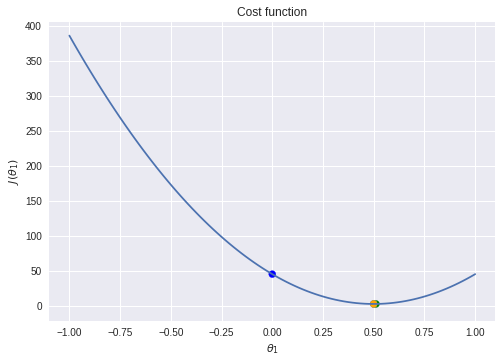

In [0]:
# YOUR CODE HERE
theta_1_values = theta_grid[:,0].numpy()
theta_1_values_iterations = theta[0,:,:][0].numpy()
print(theta_1_values_iterations)

print(J_t[0].numpy())


plt.plot(theta_1_values, np.array(J_grid));

plt.scatter(theta_1_values_iterations, J_t[0].numpy(), color=colors)
# add the plot axes labels and title
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')
plt.title('Cost function')

### Finally, generate a contour plot of the cost function

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

<a list of 17 text.Text objects>

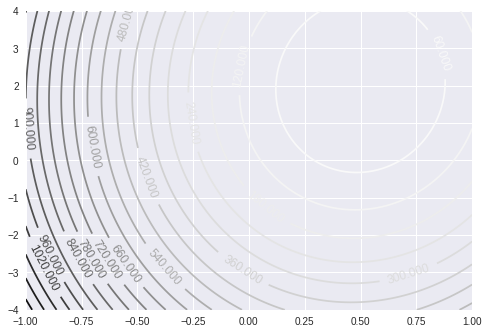

In [0]:
## Generate a grid of values for theta_0 and theta_1 and compute the cost function for every combination.

theta_0_vals = np.linspace(-1.0,1,100)
theta_1_vals = np.linspace(-4.0,4,100)
theta = torch.Tensor(len(theta_0_vals),2)

# print(theta)

# J should be 100x100



print(xc[0])

print(yc[:,0])
J = np.zeros((100,100))

for a,theta_0 in enumerate(theta_0_vals):
  for b, theta_1 in enumerate(theta_1_vals):
    theta_pair = torch.tensor([[theta_0], [theta_1]])
    # print(theta_pair, cost_func(theta_pair, X, y)[0])
    J[a,b] = cost_func(theta_pair, X, y)[0]
    
print(J)
    

    
# print(J_grid_new)
# Compute the cost function over every combination of values for theta in a variable called J which will then be plot below
# YOUR CODE HERE
xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
contours = plt.contour(xc, yc, J, 20)
plt.clabel(contours)


